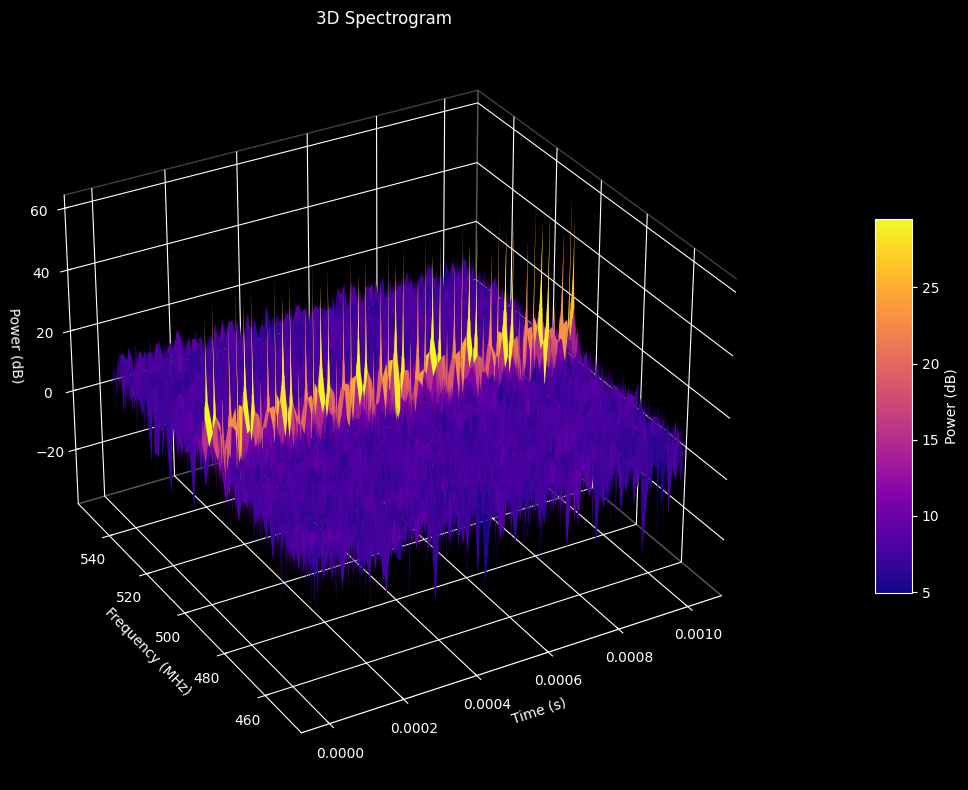

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Parameters
SAMPLE_RATE = 100e6  # Sample rate in Hz
FFT_SIZE = 1024      # Size of each FFT
NUM_FRAMES = 100     # Number of frames for the spectrogram
CENTER_FREQ = 500e6  # Center frequency in Hz

# Generate example data (replace this with real SDR data)
def generate_example_data():
    t = np.linspace(0, NUM_FRAMES / SAMPLE_RATE, NUM_FRAMES * FFT_SIZE)
    signal = np.sin(2 * np.pi * 10e6 * t) + 0.5 * np.sin(2 * np.pi * 20e6 * t)
    signal += np.random.normal(0, 0.1, len(t))  # Add some noise
    return signal

# Generate FFT data for the spectrogram
def compute_spectrogram(signal, fft_size, num_frames):
    spectrogram = []
    for i in range(num_frames):
        start = i * fft_size
        end = start + fft_size
        fft_frame = np.fft.fftshift(np.fft.fft(signal[start:end]))
        fft_magnitude = np.abs(fft_frame)
        spectrogram.append(fft_magnitude)
    return np.array(spectrogram)

# Generate example data and compute spectrogram
signal = generate_example_data()
spectrogram = compute_spectrogram(signal, FFT_SIZE, NUM_FRAMES)

# Frequency axis
freqs = np.fft.fftshift(np.fft.fftfreq(FFT_SIZE, 1 / SAMPLE_RATE)) + CENTER_FREQ

# Time axis
time = np.linspace(0, NUM_FRAMES / (SAMPLE_RATE / FFT_SIZE), NUM_FRAMES)

# Create the 3D spectrogram plot
def plot_3d_spectrogram(spectrogram, freqs, time):
    plt.style.use("dark_background")  # Enable dark mode
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Convert spectrogram to dB scale
    spectrogram_db = 20 * np.log10(spectrogram)

    # Create mesh grid for frequencies and time
    T, F = np.meshgrid(time, freqs / 1e6)

    # Plot the 3D surface
    surface = ax.plot_surface(
        T, F, spectrogram_db.T,
        cmap="plasma",
        edgecolor="none"
    )

    # Add colorbar
    cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, pad=0.1)
    cbar.set_label("Power (dB)", color="white")
    cbar.ax.yaxis.set_tick_params(color="white")
    cbar.outline.set_edgecolor("white")
    plt.setp(plt.getp(cbar.ax, "yticklabels"), color="white")

    # Set labels and title
    ax.set_title("3D Spectrogram", color="white")
    ax.set_xlabel("Time (s)", color="white")
    ax.set_ylabel("Frequency (MHz)", color="white")
    ax.set_zlabel("Power (dB)", color="white")
    ax.tick_params(axis="x", colors="white")
    ax.tick_params(axis="y", colors="white")
    ax.tick_params(axis="z", colors="white")

    # Adjust view angle for better visualization
    ax.view_init(elev=30, azim=-120)

    # Make the background fully black
    ax.set_facecolor("black")  # Overall background
    ax.xaxis.pane.set_facecolor("black")  # X-axis pane background
    ax.yaxis.pane.set_facecolor("black")  # Y-axis pane background
    ax.zaxis.pane.set_facecolor("black")  # Z-axis pane background

    # Ensure grid lines are visible
    ax.xaxis.pane.set_edgecolor("gray")  # X-axis grid lines
    ax.yaxis.pane.set_edgecolor("gray")  # Y-axis grid lines
    ax.zaxis.pane.set_edgecolor("gray")  # Z-axis grid lines

    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the 3D spectrogram
plot_3d_spectrogram(spectrogram, freqs, time)
